# pandas 2강
## 1. pandas 핵심기능
### (1) data 색인

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv('data/pd_SampleData.csv')
df.head()

#### 4) column name 이용

In [ ]:
df["Region"].head(3) # 한개 column 선택

In [ ]:
df[ ["Region", "Item", "Unit Cost"] ].head(3)  #1개 이상의 column 선택

In [ ]:
df[ :4 ] # column 정보 없이 row index정보만 있다면 row기준 추출 

In [ ]:
df[ "Region" ][ : 2 ]  
# column, row index 사용시, 해당 column의 row 기준 추출

- loc, iloc

In [ ]:
df[["OrderDate", "Region"]][:2] # column name과 index position 기준

In [ ]:
df.loc[[0,1],["OrderDate","Region"]] #index label, column name기준

In [ ]:
df.iloc[:2, :2]  #  index position과 column position 기준

### (2) 재색인
#### 1) Series

In [ ]:
S_obj = Series([ 2.2, 3, 4.2, 5], index = ["c", "a", "b", "d"])
S_obj

In [ ]:
S_obj2 = Series(S_obj, index = ["a", "b" ,"c" ,"d" ,"e"])
S_obj2

- reindex 이용

In [ ]:
S_obj3 = S_obj.reindex(["aa", "a", "b", "c", "d"])
S_obj3

In [ ]:
S_obj4 = Series(['apple', 'banana', 'carrot'], index=[1,3,5])
S_obj4

In [ ]:
S_obj4.reindex(range(6), method="pad")

#### 2) DataFrame

In [ ]:
df.index = df["Units"] # units컬럼의 data를 row index number로 할당
df.head()

In [ ]:
df.index = list(range(0,43)) # list를 활용한 순차적 indexing
df.head()

### (3) 로우 또는 컬럼 삭제

- row 삭제

In [ ]:
df.drop(1).head(3)  # index label로 drop

In [ ]:
df.drop([2,3]).head(3) # 한개 이상의 index label로 drop 

- axis 지정한 축을 기준으로 삭제

In [ ]:
df.drop("OrderDate", axis = 1).head(3)  # df.drop(["Rep", "Item"], axis = 1)

- 실제 drop 되는 것은 아니고, 복사본을 만들어서 보여주는 것
- drop된 dataframe을 생성하고 싶으면 다시 할당 해야함
- 즉시 반영하고 싶으면 inplace = True 사용 


In [ ]:
df.head(3)

In [ ]:
df_drop = df.drop("name", axis = 1)  # drop 반영한 새로운 dataframe 생성
df_drop.head(3)

In [ ]:
df_drop.drop("Item", axis = 1, inplace = True)  # 현재 dataframe에 바로 반영
df_drop.head(3)

## 2. pandas 내장함수

### (1) describe
- numeric type 데이터의 요약 정보를 보여줌

In [ ]:
from pandas import Series, DataFrame
import pandas as pd

df = pd.read_csv('data/pd_SampleData2.csv')
#df.drop("OrderDate", axis = 1, inplace = True)
df.head()

In [ ]:
df.describe()

### unique를 활용한 str -> unique한 numeric으로 변경
- series data의 유일한 값을 리턴

In [ ]:
df.Item.unique()  # 유일한 Item 리턴

- emumerate 활용 값의 index를 얻어오게 함

In [ ]:
d_item = dict(enumerate(df["Item"].unique())) # dict type로 index 가져오기
d_item

- dict reverse

In [ ]:
d_re_item = dict(map(reversed, d_item.items()))
d_re_item

- replace 이용 str --> numeric 변경

In [ ]:
df["Item"].replace(d_re_item, inplace = True)

In [ ]:
df.head()

- name, Region 변경

In [ ]:
d_region = dict(enumerate(df["Region"].unique())) # dict type로 index 가져오기
d_re_region = dict(map(reversed, d_region.items()))
df["Region"].replace(d_re_region, inplace = True)
df.head()

In [ ]:
d_name = dict(enumerate(df["name"].unique())) # dict type로 index 가져오기
d_re_name = dict(map(reversed, d_name.items()))
df["name"].replace(d_re_name, inplace = True)
df.head()

In [ ]:
df.describe()

### (3) sum
- pandas는 칼럼, 로우값의 연산을 지원 ( axis 이용)

In [ ]:
df.sum(axis=0)  # column 합산

In [ ]:
df.sum(axis=1).head() # row 합산

### (4) 정렬
- 어떤 기준에 근거해서 데이터를 정렬

#### 1) sort_index
- row, column의 색인 기준으로 정렬

In [ ]:
df.sort_index(axis=0).head(3)

- column 축 기준 정렬, 문자열의 경우 알파벳, 대문자> 소문자 순으로 정렬

In [ ]:
df.sort_index(axis=1).head(3)

#### 2) sort_value
- column의 value 기준으로 데이터 정렬

In [ ]:
df.sort_values([ "Unit Cost", "Total"], ascending = False).head()  
# ascending = False는 내림차순 정렬

### (5) cumsum
- cumulative sum : 누적합을 리턴

In [ ]:
df.cumsum().head()  # 누적합

### (6) correlation & covariance
- corr : 상관계수
- cov : 공분산

In [ ]:
df.corr() # 전체 상관관계

In [ ]:
df.cov() # 전체 공분산

In [ ]:
df.Total.corr(df.Units)  # df의 변수간 상관관계

In [ ]:
df.Total.cov(df.Units)  # df의 변수간 공분산

In [ ]:
df.corrwith(df.Total)  #  다른시리즈나 데이터프레인과 상관관계 계산 
                        #  하나의 변수와 나머지 변수 간의 상관관계를 볼 때 좋음

### (7) isnull
- column 또는 row 값의 NaN값의 index 반환
- 결측치를 찾을 수 있음

In [ ]:
df2 = DataFrame([[1, 3.5, 2], [2, np.nan, 3], [np.nan, np.nan, 4]])
df2

In [ ]:
df2.isnull()

### (8) 기타분석함수


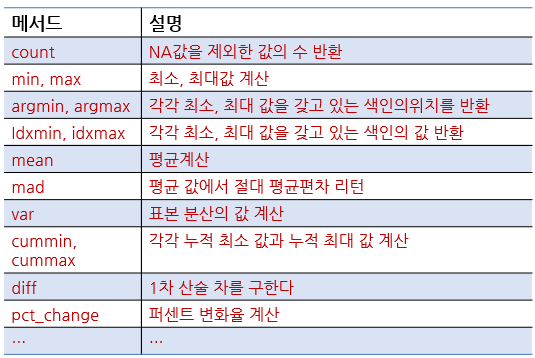

## 3. pandas 예제
Sample data : Bike Sharing demand from Kaggle
   [ https://www.kaggle.com/c/bike-sharing-demand/data ] 


In [ ]:
import pandas as pd

data = pd.read_csv('data/pd_bikeshare.csv')
data.head()

### (1)  column 추가
- datetime을 년, 월, 일로 나누어 추가

In [ ]:
# 'year', 'month', 'hour' column 새로 생성
datetime = pd.DatetimeIndex(data['datetime'])
# DatetimeIndex 함수사용 시간 객체로 만들어 각각의 메소드로 추출 가능 
data['year'] = datetime.year
data['month'] = datetime.month
data['hour'] = datetime.hour
data.head()

### (2)  column drop
- datetime column drop

In [ ]:
# Drop 'datetime'
data.drop('datetime', axis=1, inplace=True)
data.head()

- 2개이상 drop

In [ ]:
data.drop(['casual', 'registered'], axis=1, inplace=True)
data.head()

### (3) data 정보 확인

- numeric type의 데이터 요약정보

In [ ]:
data.describe()

- 상관관계

In [ ]:
data.corr()

### (4) data Visualization
- 숫자가 많으면 보기 힘드므로 이미지화 해서 data에 대한 정보를 추측할 수 있다

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 컬럼을 리스트 형태로 담기
data2 = list(data.columns)

# correlation matrix
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data2)
ax.set_yticklabels(data2)
plt.show()

### (5)  rename
- count는 method이기 때문에 total로변경

In [ ]:
data.rename(columns={'count':'total'}, inplace=True)
data.head()

### (6) Data 저장
- pickle 형태
- csv 형태

In [ ]:
# pickle - 1
data.to_pickle('data/save_bike_data.pkl')

In [ ]:
# pickle - 2
import pickle
with open('data/save_bike_data_2.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
# csv
data.to_csv('data/save_bike_data.csv')

### (7) 학습을위한 split
- bike share data의 여러변수를 학습시켜 수요를 학습하기 위해 
  입력 X와 출력 Y로 data split

In [ ]:
X = data.drop('total', axis=1)
Y = data['total']

In [ ]:
X.head()

In [ ]:
Y.head()